___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [253]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [255]:
male = pd.read_csv("ANSUR II MALE Public.csv",encoding="ISO-8859-1")
female = pd.read_csv("ANSUR II FEMALE Public.csv",encoding="ISO-8859-1")

In [256]:
male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [257]:
female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [258]:
male.shape

(4082, 108)

In [259]:
female.shape

(1986, 108)

- burda bizim columlar onemli concat icin. Columm isimlerin ayni olmasi ve ayni miktarda colum olmali aksi durumda cancate durumunda colum sayisi artacak verimizde null degerler artacak.
- yukarda gordugunuz gibi male ile female arasindaki subject id yazim farkliligi var ikisi ayni veri olmasina ragmen yazilimsal farkliliktan dolayi concat ettigimizde verimiz de yeni bir colum olusturacak bu durmu istemedigimizden dolayi female deki subject id yi ismini duzelticezzzz

In [260]:
female.rename(columns = {'SubjectId':'subjectid'}, inplace = True)
female

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,29501,285,1392,335,223,1297,252,196,368,299,...,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand
1982,29502,262,1324,301,202,1204,236,181,378,294,...,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand
1983,29503,260,1334,318,213,1259,234,183,363,332,...,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand
1984,29511,205,1293,302,199,1207,213,163,376,276,...,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand


In [261]:
data = pd.concat([male,female])
df= data.copy()

## Explore Data

In [262]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [263]:
df.shape

(6068, 108)

In [264]:
df.info(verbose=True)
# verbose butun columlari tek seferde bilgilerini getiriyoreee

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [265]:
df.isna().sum().any() # bir tane de olsa null var ama neredeeeee

True

In [266]:
df.isnull().sum()

subjectid                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
DODRace                           0
Age                               0
Heightin                          0
Weightlbs                         0
WritingPreference                 0
Length: 108, dtype: int64

In [267]:
df.isna().sum().sort_values(ascending=False)

Ethnicity                         4647
subjectid                            0
radialestylionlength                 0
thighcircumference                   0
tenthribheight                       0
                                  ... 
earprotrusion                        0
earlength                            0
earbreadth                           0
crotchlengthposterioromphalion       0
WritingPreference                    0
Length: 108, dtype: int64

In [268]:
df.duplicated().sum()

0

- simdide  datamizin icindeki object verilerin uniquelerine bakicaz.

In [269]:
categoric = df.select_dtypes(include='object')
for col in categoric.columns:
    print(col)
    print(df[col].nunique())
    print("-------------")

Gender
2
-------------
Date
253
-------------
Installation
12
-------------
Component
3
-------------
Branch
3
-------------
PrimaryMOS
285
-------------
SubjectsBirthLocation
152
-------------
Ethnicity
209
-------------
WritingPreference
3
-------------


- simdbi birde target columimiza bakalim

In [270]:
df["DODRace"].value_counts() 
# target ccolumumuz 7 farkli sinif var 
#  bu projhemiz demekki multi clasification 

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [271]:
df.describe(include=int).T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.0,20757.198418,13159.390894,10027.0,14841.75,20063.5,27234.50,920103.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
...,...,...,...,...,...,...,...,...
SubjectNumericRace,6068.0,17.515326,550.949948,1.0,1.00,1.0,2.00,42351.0
DODRace,6068.0,1.615030,0.979156,1.0,1.00,1.0,2.00,8.0
Age,6068.0,29.761206,8.674650,17.0,23.00,28.0,36.00,58.0
Heightin,6068.0,68.257251,3.861954,56.0,66.00,68.0,71.00,94.0


- Biz asagidaki iki datanin ilk ciktilara gore ayni oldugunu dusunmustuk ama degil fakrli duruyor

In [272]:
df[["DODRace","SubjectNumericRace"]]

,DODRace,SubjectNumericRace
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
...,...,...
1981,3,3
1982,3,3
1983,2,2
1984,3,3


In [273]:
df["DODRace"].value_counts(dropna=False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [274]:
df["SubjectNumericRace"].sample(10)

859     1
1578    1
3379    1
1362    2
611     1
1965    1
1244    1
88      2
3573    1
3229    1
Name: SubjectNumericRace, dtype: int64

In [275]:
df["SubjectNumericRace"].value_counts(dropna=False)

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

- biz godukki bu ii collum benzer sonuclar vermekte hem malinayi yormamamk hem veri sizintiisni onlemek icin subject li olani dusurmeye karar verdim canim kendimmmmm

In [276]:
df["SubjectNumericRace"] = df["SubjectNumericRace"].apply(lambda x: 4 if x == 5 or x == 6 or x >= 8  else x)
df["SubjectNumericRace"].value_counts()

1    3561
2    1026
4     940
3     541
Name: SubjectNumericRace, dtype: int64

- simdi domain arastimasi sonucunda bazi columlari drop etmeyece karar verdik.

In [277]:
df["DODRace"] = df["DODRace"].apply(lambda x: 4 if x == 5 or x == 6 or x == 8 else x)
df["DODRace"].value_counts()
# burda lamdanin icinde x 4 ve sonrasini 4  e
# esitledik sebebi veri olarak zten azlardi

1    3792
2    1298
3     679
4     299
Name: DODRace, dtype: int64

- Makale incelendihginde diyorki veri libre verilmis ama Kg olmasi isteniyor
- sonra boy inch verilmis mm isteniyor makalede

In [278]:
df.drop("SubjectNumericRace", axis = 1, inplace = True)

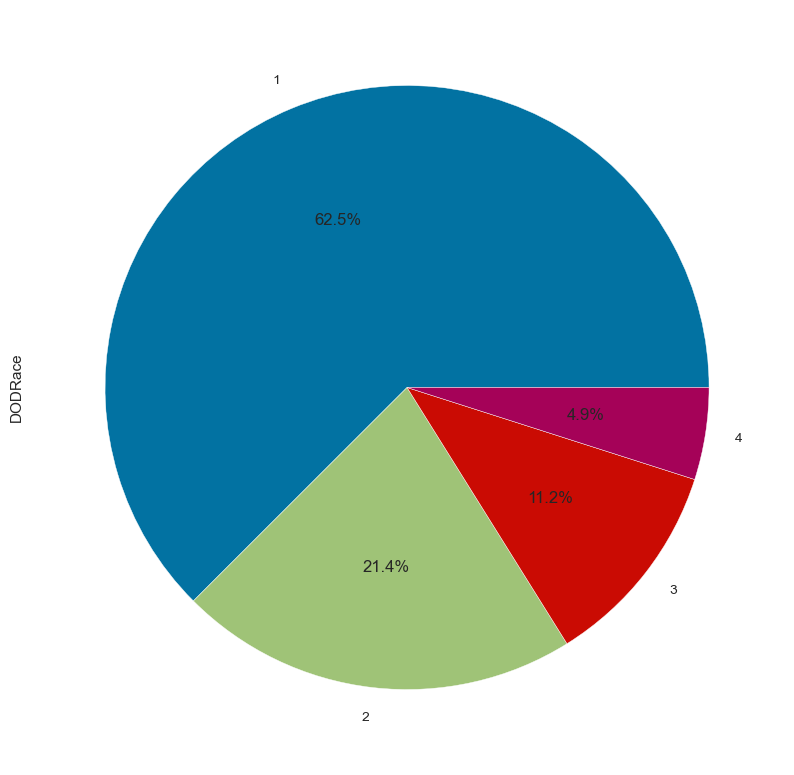

In [279]:
df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));


In [280]:
df.head(1).T

,0
subjectid,10027
abdominalextensiondepthsitting,266
acromialheight,1467
acromionradialelength,337
anklecircumference,222
...,...
DODRace,1
Age,41
Heightin,71
Weightlbs,180


In [281]:
df.drop("subjectid", axis = 1, inplace = True)

In [282]:
df.drop(["WritingPreference","Ethnicity","PrimaryMOS","Date","Installation"], axis = 1, inplace = True)

In [283]:
df.Branch.value_counts()

Combat Service Support    3174
Combat Arms               1582
Combat Support            1312
Name: Branch, dtype: int64

In [284]:
df.groupby(["Branch"])["DODRace"].value_counts()

Branch                  DODRace
Combat Arms             1          1146
                        3           189
                        2           173
                        4            74
Combat Service Support  1          1911
                        2           745
                        3           365
                        4           153
Combat Support          1           735
                        2           380
                        3           125
                        4            72
Name: DODRace, dtype: int64

In [285]:
df.Component.value_counts()

Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: Component, dtype: int64

In [286]:
df.groupby(["Component"])["DODRace"].value_counts()

Component            DODRace
Army National Guard  1          1855
                     2           499
                     3           253
                     4           101
Army Reserve         1           114
                     2            52
                     3            41
                     4            13
Regular Army         1          1823
                     2           747
                     3           385
                     4           185
Name: DODRace, dtype: int64

In [287]:
df.groupby(["Component","Branch"])["DODRace"].value_counts(),

(Component            Branch                  DODRace
 Army National Guard  Combat Arms             1          623
                                              2           79
                                              3           74
                                              4           31
                      Combat Service Support  1          917
                                              2          312
                                              3          142
                                              4           54
                      Combat Support          1          315
                                              2          108
                                              3           37
                                              4           16
 Army Reserve         Combat Arms             1            5
                                              3            1
                      Combat Service Support  1           82
                               

- hocam ikna oldu cunku irkciligin en fazla oldugu kisim kategoriklestirme diye dusunduk ondan dolayi branchi tutalim companentti drop edelim dedik
- cunku eger bir irk ayrimi yapilacak ise componentta degil branch de yapilacaktir
- yani deniz kara hava herkse alinacak ama uzmanlik da irkcilik devreye girebilirmissss...

In [288]:
df.drop(["Component","Branch"],axis=1,inplace=True)

- datamizde demislerdiki lb kg diye iki colum var bizden istenen kg digerini drop babyyy



In [289]:
df[['Weightlbs','weightkg']]

,Weightlbs,weightkg
0,180,815
1,160,726
2,205,929
3,175,794
4,213,946
...,...,...
1981,180,832
1982,150,717
1983,168,762
1984,133,632


<AxesSubplot:>

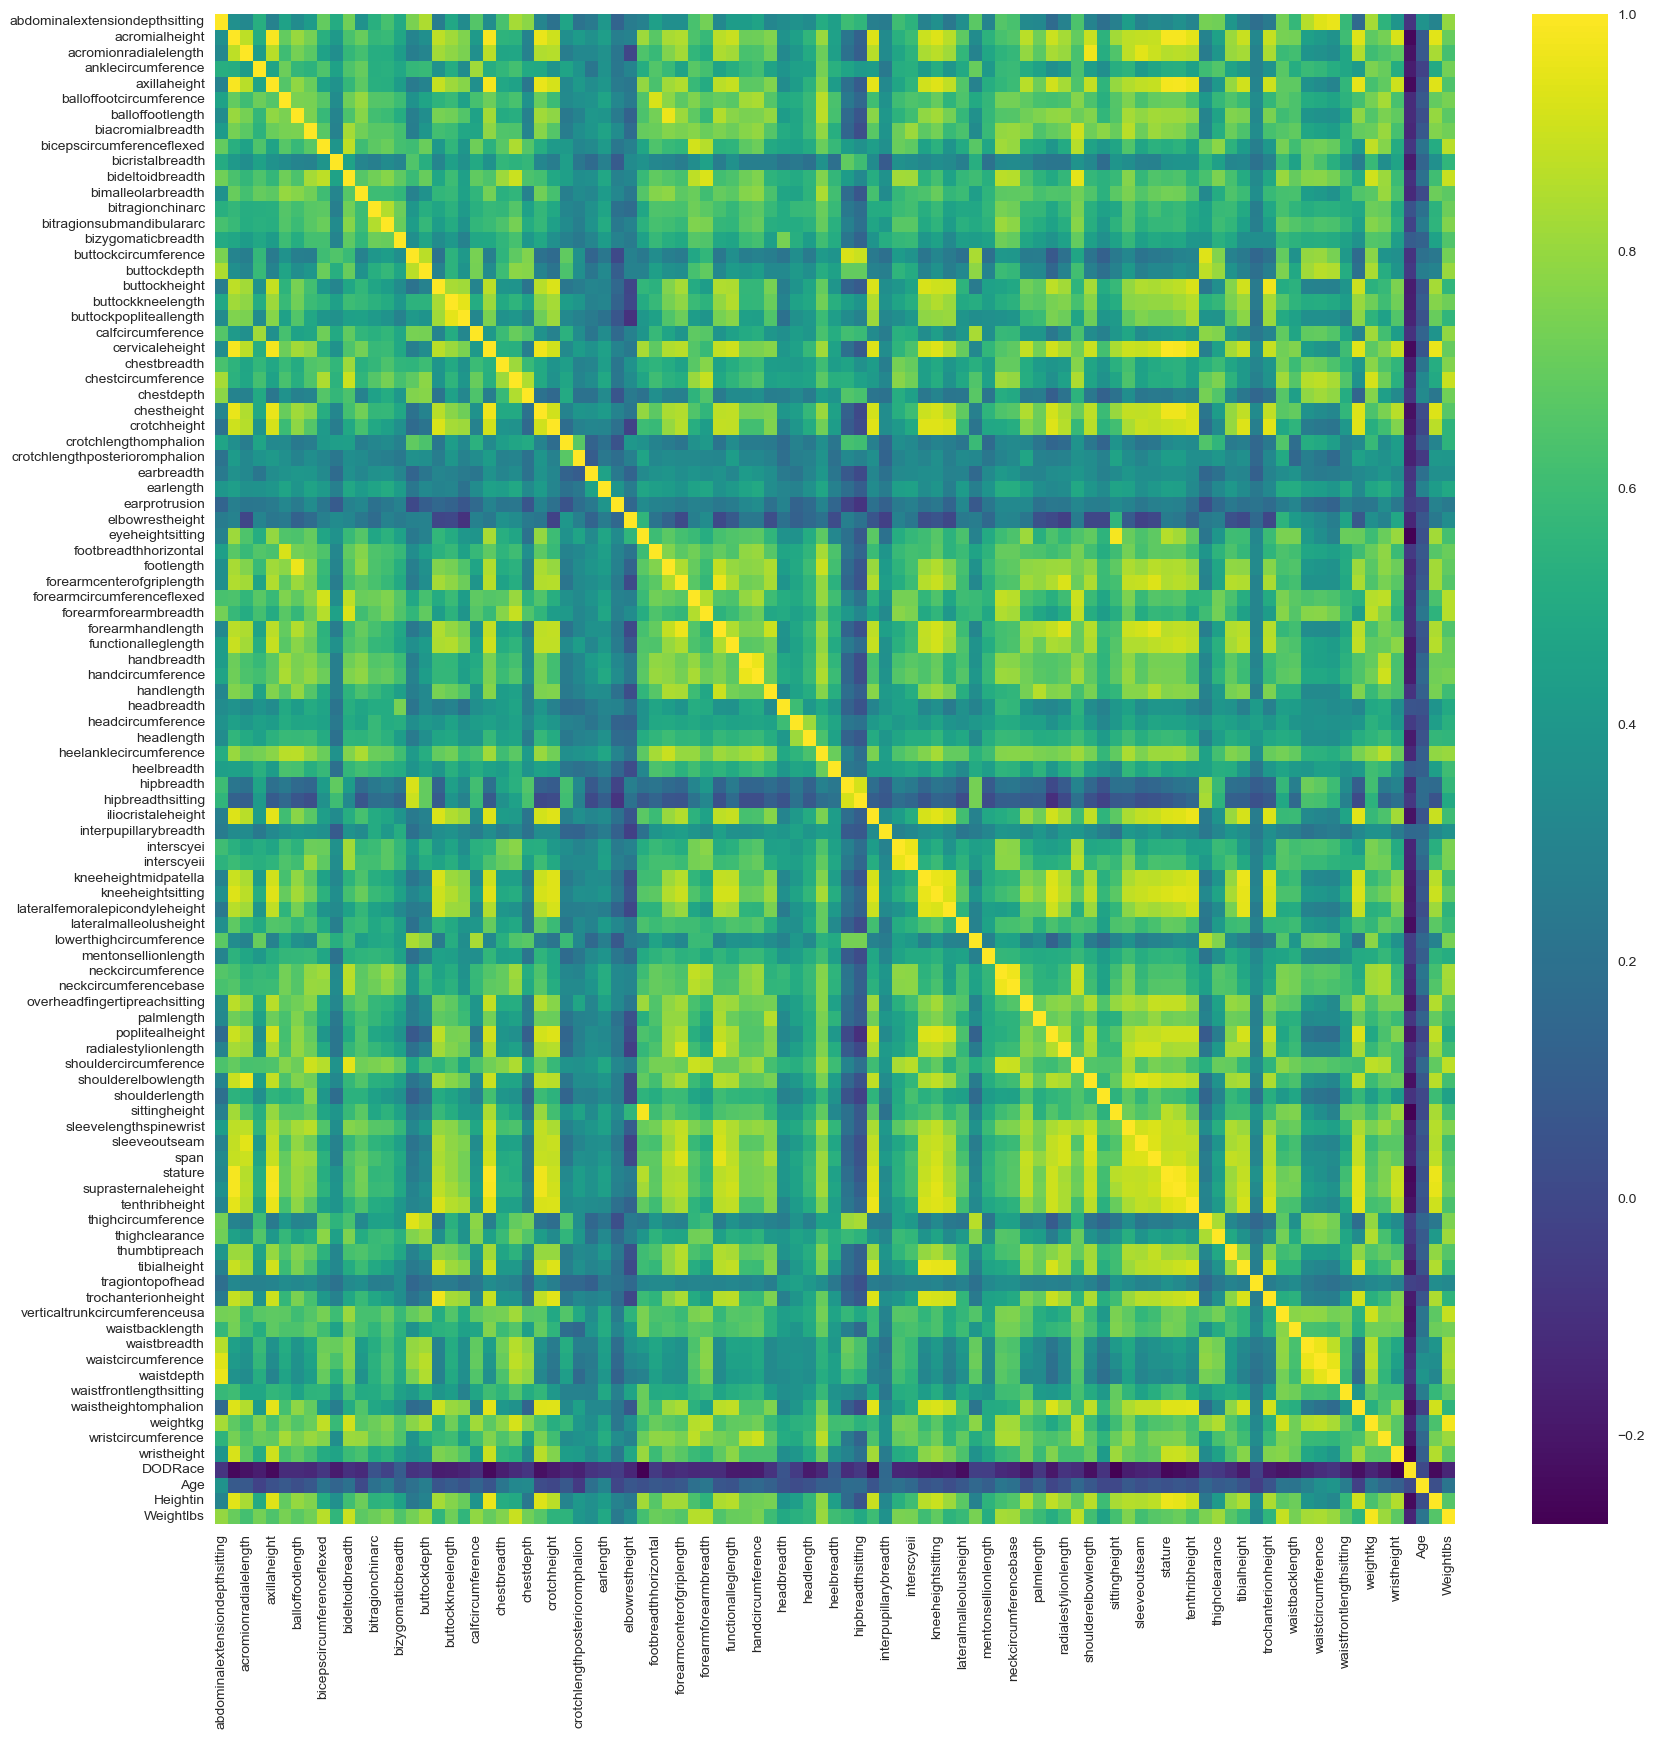

In [290]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="viridis")

In [291]:
df.head(1).T

,0
abdominalextensiondepthsitting,266
acromialheight,1467
acromionradialelength,337
anklecircumference,222
axillaheight,1347
...,...
SubjectsBirthLocation,North Dakota
DODRace,1
Age,41
Heightin,71


In [292]:
numeric =df.select_dtypes(include='int64')

In [293]:
def detect_outliers(df, col_name,tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [294]:
out_cols = []
for col in numeric:
    print(
        f"{col}\nlower:{detect_outliers(df, col,3)[0]} \nupper:{detect_outliers(df, col,3)[1]}\
        \noutlier:{detect_outliers(df, col,3)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col,3)[2] > 0 :
        out_cols.append(col)
print(out_cols)    

abdominalextensiondepthsitting
lower:63.0 
upper:427.0        
outlier:1
*-*-*-*-*-*-*
acromialheight
lower:1014.0 
upper:1798.0        
outlier:0
*-*-*-*-*-*-*
acromionradialelength
lower:228.25 
upper:426.0        
outlier:0
*-*-*-*-*-*-*
anklecircumference
lower:151.0 
upper:298.0        
outlier:0
*-*-*-*-*-*-*
axillaheight
lower:949.0 
upper:1649.0        
outlier:0
*-*-*-*-*-*-*
balloffootcircumference
lower:160.0 
upper:328.0        
outlier:0
*-*-*-*-*-*-*
balloffootlength
lower:128.0 
upper:261.0        
outlier:0
*-*-*-*-*-*-*
biacromialbreadth
lower:241.0 
upper:556.0        
outlier:0
*-*-*-*-*-*-*
bicepscircumferenceflexed
lower:134.0 
upper:547.0        
outlier:0
*-*-*-*-*-*-*
bicristalbreadth
lower:184.0 
upper:366.0        
outlier:0
*-*-*-*-*-*-*
bideltoidbreadth
lower:280.0 
upper:700.0        
outlier:0
*-*-*-*-*-*-*
bimalleolarbreadth
lower:44.0 
upper:100.0        
outlier:0
*-*-*-*-*-*-*
bitragionchinarc
lower:248.0 
upper:402.0        
outlier:0
*-*-*-*-*-*-*
bi

In [295]:
df= pd.get_dummies(data=df,drop_first=True)

In [296]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     299
Name: DODRace, dtype: int64

In [297]:
numeric= df[['abdominalextensiondepthsitting', 'chestdepth', 'hipbreadth', 'hipbreadthsitting', 'lowerthighcircumference', 'thighclearance', 'waistdepth', 'Heightin', 'Weightlbs']]

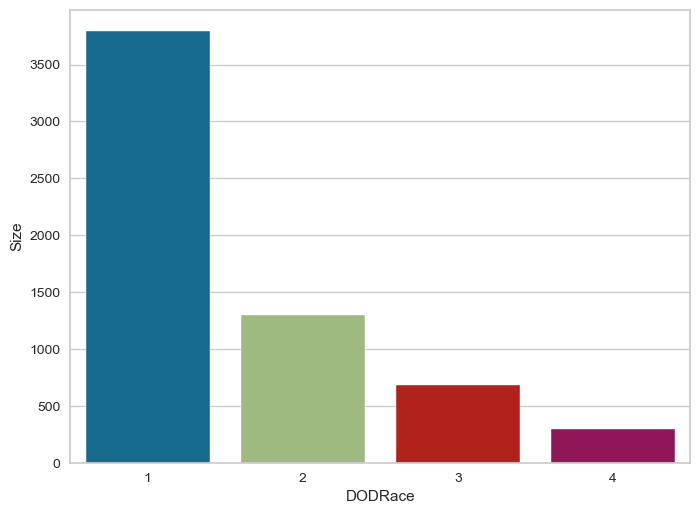

In [298]:
class_tree = df.groupby('DODRace').size()
class_label = pd.DataFrame(class_tree,columns = ['Size'])
plt.figure(figsize = (8,6))
sns.barplot(x = class_label.index, y = 'Size',data = class_label);

- bu data alanennn imbalance napcazzzzz ?


In [299]:
# outlierss ile ilgili buraya kod yaz
# box plot yap
# guzel bir heatmap uap

index = 0
plt.figure(figsize=(20,20))
for feature in df_cont.columns :
    if feature != 'target' :
        index += 1
        plt.subplot(3,2,index)
        sns.boxplot(x = 'target', y = feature, data = df_cont)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [300]:
#pip install yellowbrick

In [301]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score, 

SyntaxError: trailing comma not allowed without surrounding parentheses (3609337407.py, line 25)

In [ ]:
X = df.drop("DODRace", axis = 1)

y = df["DODRace"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y)
y.reset_index(drop=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array([3, 1, 2, ..., 1, 1, 3])

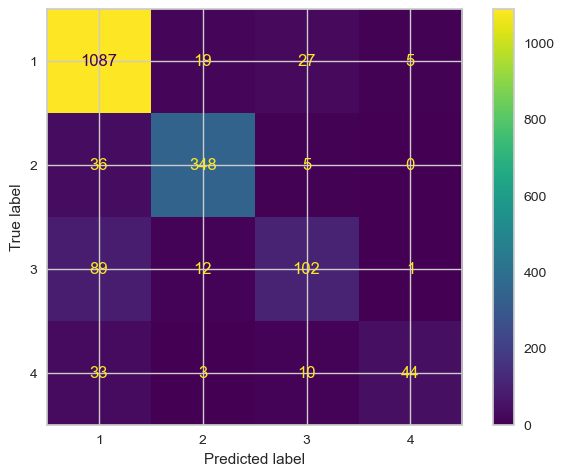

In [ ]:
plot_confusion_matrix(log_model, X_test_scaled, y_test)

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[1087   19   27    5]
 [  36  348    5    0]
 [  89   12  102    1]
 [  33    3   10   44]]
              precision    recall  f1-score   support

           1       0.87      0.96      0.91      1138
           2       0.91      0.89      0.90       389
           3       0.71      0.50      0.59       204
           4       0.88      0.49      0.63        90

    accuracy                           0.87      1821
   macro avg       0.84      0.71      0.76      1821
weighted avg       0.86      0.87      0.86      1821


Train_Set
[[2590   15   40    9]
 [  64  831   13    1]
 [ 158   25  291    1]
 [  77    8   14  110]]
              precision    recall  f1-score   support

           1       0.90      0.98      0.93      2654
           2       0.95      0.91      0.93       909
           3       0.81      0.61      0.70       475
           4       0.91      0.53      0.67       209

    accuracy                           0.90      4247
   macro avg       0.89      0.76

### Cross Validate

In [ ]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.882737
test_precision_weighted    0.880861
test_recall_weighted       0.882737
test_f1_weighted           0.874646
dtype: float64

In [ ]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[1087   19   27    5]
 [  36  348    5    0]
 [  89   12  102    1]
 [  33    3   10   44]]
              precision    recall  f1-score   support

           1       0.87      0.96      0.91      1138
           2       0.91      0.89      0.90       389
           3       0.71      0.50      0.59       204
           4       0.88      0.49      0.63        90

    accuracy                           0.87      1821
   macro avg       0.84      0.71      0.76      1821
weighted avg       0.86      0.87      0.86      1821


Train_Set
[[2590   15   40    9]
 [  64  831   13    1]
 [ 158   25  291    1]
 [  77    8   14  110]]
              precision    recall  f1-score   support

           1       0.90      0.98      0.93      2654
           2       0.95      0.91      0.93       909
           3       0.81      0.61      0.70       475
           4       0.91      0.53      0.67       209

    accuracy                           0.90      4247
   macro avg       0.89      0.76

### Logistic Model GridsearchCV

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_logic = make_scorer(f1_score, average = None, labels =["DODRace"])
precision_logic = make_scorer(precision_score, average = None, labels =["DODRace"])
recall_logic = make_scorer(recall_score, average = None, labels =["DODRace"])

In [ ]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"f1_logic":f1_logic, 
                                                                   "precision_logic":precision_logic,
                                                                   "recall_logic":recall_logic}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_logic          NaN
test_precision_logic   NaN
test_recall_logic      NaN
dtype: float64

In [ ]:
y_pred_train=log_model.predict(X_train_scaled)
y_pred_test=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_1"] = y_pred_proba[:,0]
test_data["pred_proba_2"] = y_pred_proba[:,1]
test_data["pred_proba_3"] = y_pred_proba[:,2]
test_data["pred_proba_4"] = y_pred_proba[:,3]
test_data.sample(10)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,SubjectsBirthLocation_West Virginia,SubjectsBirthLocation_Wisconsin,SubjectsBirthLocation_Wyoming,SubjectsBirthLocation_Zambia,DODRace,pred,pred_proba_1,pred_proba_2,pred_proba_3,pred_proba_4
987,268,1339,308,227,1248,237,177,374,300,284,...,0,0,0,0,1,1,0.870574,0.003546,0.066644,0.059236
788,315,1322,318,231,1200,241,192,428,380,273,...,0,0,0,0,1,1,0.621412,0.003130,0.349866,0.025593
1975,311,1406,330,223,1288,248,195,414,366,272,...,0,0,0,0,1,3,0.422025,0.056404,0.504618,0.016954
1526,203,1342,324,188,1228,215,179,375,266,264,...,0,0,0,0,2,1,0.810388,0.110121,0.067922,0.011569
1426,244,1422,342,233,1318,240,192,419,346,272,...,0,0,0,0,1,1,0.983847,0.006502,0.003687,0.005965
2616,225,1490,361,222,1386,260,205,451,334,281,...,0,0,0,0,1,1,0.660558,0.040681,0.280874,0.017887
1169,213,1272,302,205,1176,214,180,353,276,241,...,0,0,0,0,1,1,0.963508,0.005171,0.025578,0.005743
4041,276,1476,335,217,1370,249,197,427,351,282,...,0,0,0,0,1,1,0.824158,0.016121,0.152202,0.007519
343,250,1480,361,242,1364,254,195,405,331,326,...,0,0,0,0,1,1,0.964396,0.022479,0.009253,0.003873
113,321,1504,343,253,1386,270,205,434,393,305,...,0,0,0,0,1,1,0.910198,0.013672,0.071409,0.004721


In [302]:

log_accuracy_test = accuracy_score(y_test, y_pred_test)
log_accuracy_train = accuracy_score(y_train, y_pred_train)

## 2. SVC

### Vanilla SVC model 

In [64]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
from sklearn.ensemble import BaggingClassifier
modelSVM = BaggingClassifier(SVC(), n_jobs=-1, max_samples=.1,n_estimators=5) 

In [66]:
modelSVM.fit(X_train_scaled , y_train)

BaggingClassifier(base_estimator=SVC(), max_samples=0.1, n_estimators=5,
                  n_jobs=-1)

In [198]:
y_pred_test = modelSVM.predict(X_test_scaled)
y_pred_train = modelSVM.predict(X_train_scaled)

In [199]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

TEST REPORT
              precision    recall  f1-score   support

           1       0.72      1.00      0.84      1138
           2       0.96      0.60      0.74       389
           3       0.00      0.00      0.00       204
           4       0.00      0.00      0.00        90

    accuracy                           0.75      1821
   macro avg       0.42      0.40      0.39      1821
weighted avg       0.66      0.75      0.68      1821




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.72      1.00      0.84      2654
           2       0.97      0.62      0.75       909
           3       0.00      0.00      0.00       475
           4       0.00      0.00      0.00       209

    accuracy                           0.76      4247
   macro avg       0.42      0.40      0.40      4247
weighted avg       0.66      0.76      0.69      4247



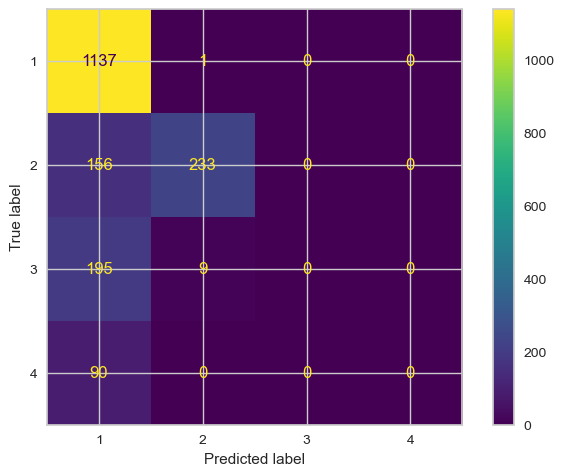

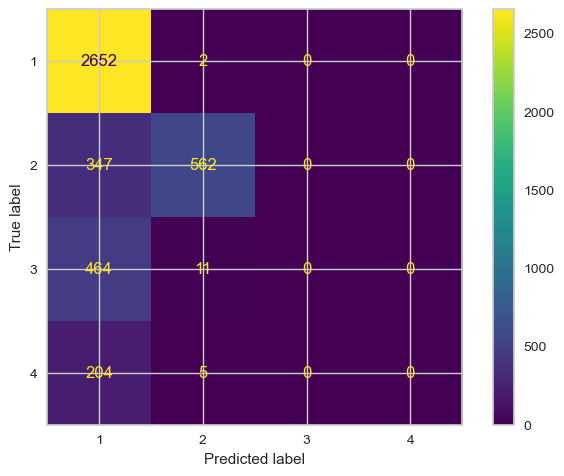

In [68]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(modelSVM, X_test_scaled, y_test);

print("\n"*3, "-*"*30)

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(modelSVM, X_train_scaled, y_train);

###  SVC Model GridsearchCV

In [69]:
param_grid = {
    'base_estimator__C': np.linspace(0.01,1, 3),
}

In [70]:
from sklearn.model_selection import GridSearchCV
model = BaggingClassifier(SVC(kernel="linear"), n_jobs=-1, max_samples=.1,n_estimators=5,random_state=6)
svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="f1_macro",
                              n_jobs=-1)

svm_model_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .............................base_estimator__C=0.01; total time=   0.1s
[CV] END .............................base_estimator__C=0.01; total time=   0.1s
[CV] END .............................base_estimator__C=0.01; total time=   0.2s
[CV] END .............................base_estimator__C=0.01; total time=   0.1s
[CV] END .............................base_estimator__C=0.01; total time=   0.2s
[CV] END ..............................base_estimator__C=1.0; total time=   0.1s
[CV] END ..............................base_estimator__C=1.0; total time=   0.1s
[CV] END ............................base_estimator__C=0.505; total time=   0.2s
[CV] END ..............................base_estimator__C=1.0; total time=   0.1s
[CV] END ..............................base_estimator__C=1.0; total time=   0.1s
[CV] END ..............................base_estimator__C=1.0; total time=   0.1s
[CV] END ............................base_estimat

GridSearchCV(estimator=BaggingClassifier(base_estimator=SVC(kernel='linear'),
                                         max_samples=0.1, n_estimators=5,
                                         n_jobs=-1, random_state=6),
             n_jobs=-1,
             param_grid={'base_estimator__C': array([0.01 , 0.505, 1.   ])},
             scoring='f1_macro', verbose=2)

In [71]:
svm_model_grid.best_params_

{'base_estimator__C': 1.0}

In [72]:
svm_model_grid.best_estimator_

BaggingClassifier(base_estimator=SVC(kernel='linear'), max_samples=0.1,
                  n_estimators=5, n_jobs=-1, random_state=6)

In [73]:
y_pred_test = svm_model_grid.predict(X_test_scaled)
y_pred_train = svm_model_grid.predict(X_train_scaled)

TEST REPORT
              precision    recall  f1-score   support

           1       0.81      0.98      0.89      1138
           2       0.92      0.83      0.87       389
           3       0.91      0.24      0.38       204
           4       1.00      0.33      0.50        90

    accuracy                           0.84      1821
   macro avg       0.91      0.60      0.66      1821
weighted avg       0.85      0.84      0.81      1821




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.82      0.99      0.90      2654
           2       0.95      0.86      0.90       909
           3       0.94      0.28      0.43       475
           4       0.94      0.30      0.46       209

    accuracy                           0.85      4247
   macro avg       0.91      0.61      0.67      4247
weighted avg       0.87      0.85      0.82      4247



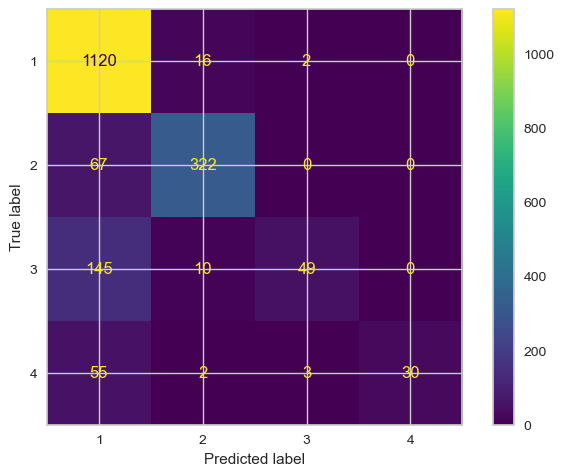

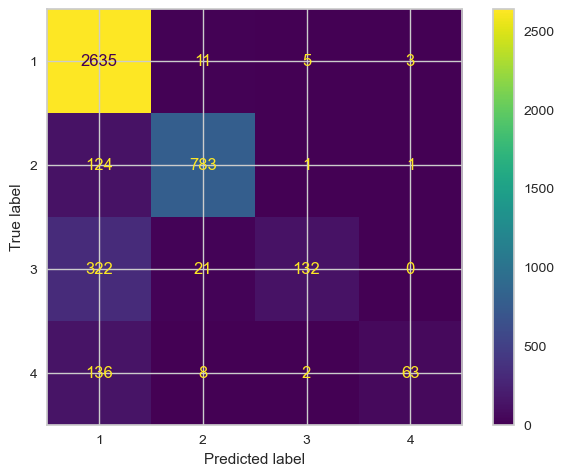

In [74]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(svm_model_grid, X_test_scaled, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(svm_model_grid, X_train_scaled, y_train);

In [ ]:
pip install yellowbrick

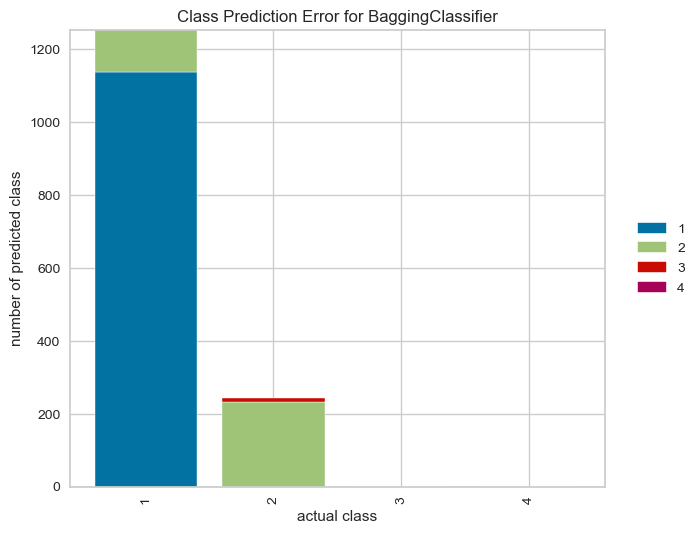

<AxesSubplot:title={'center':'Class Prediction Error for BaggingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [76]:
from yellowbrick.classifier import ClassPredictionError


visualizer = ClassPredictionError(modelSVM)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show()

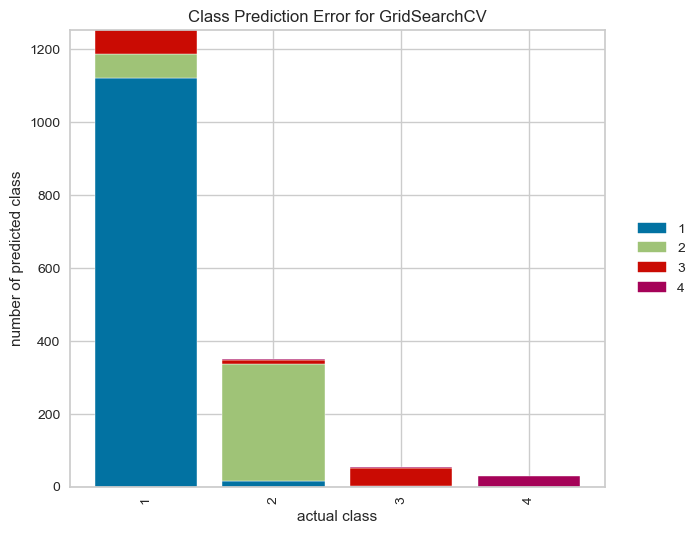

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [77]:
visualizer = ClassPredictionError(svm_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show()

## 3. RF

### Vanilla RF Model

In [78]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

TEST REPORT
              precision    recall  f1-score   support

           1       0.77      0.97      0.86      1138
           2       0.84      0.72      0.77       389
           3       0.72      0.14      0.24       204
           4       0.90      0.10      0.18        90

    accuracy                           0.78      1821
   macro avg       0.81      0.48      0.51      1821
weighted avg       0.79      0.78      0.74      1821




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2654
           2       1.00      1.00      1.00       909
           3       1.00      1.00      1.00       475
           4       1.00      1.00      1.00       209

    accuracy                           1.00      4247
   macro avg       1.00      1.00      1.00      4247
weighted avg       1.00      1.00      1.00      4247



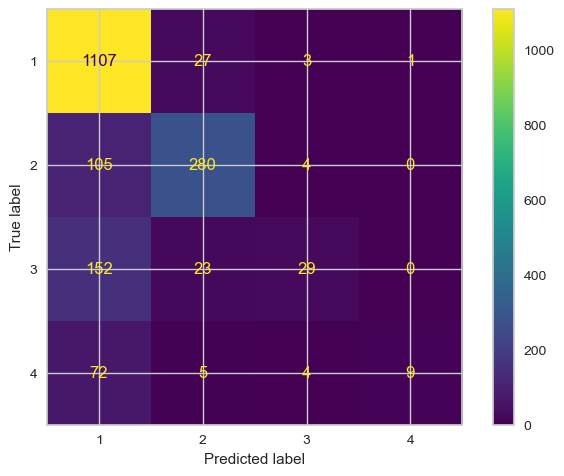

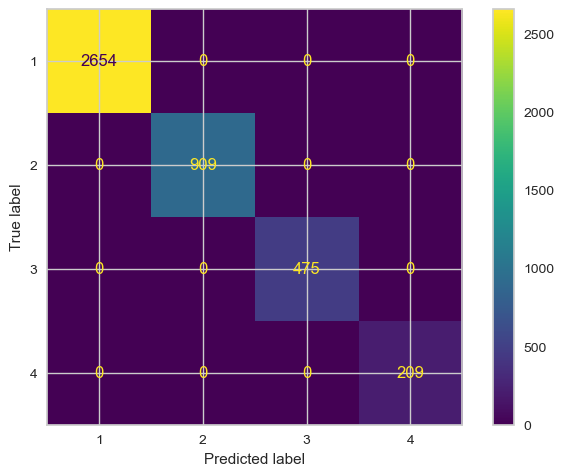

In [80]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(rfc, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(rfc, X_train, y_train);

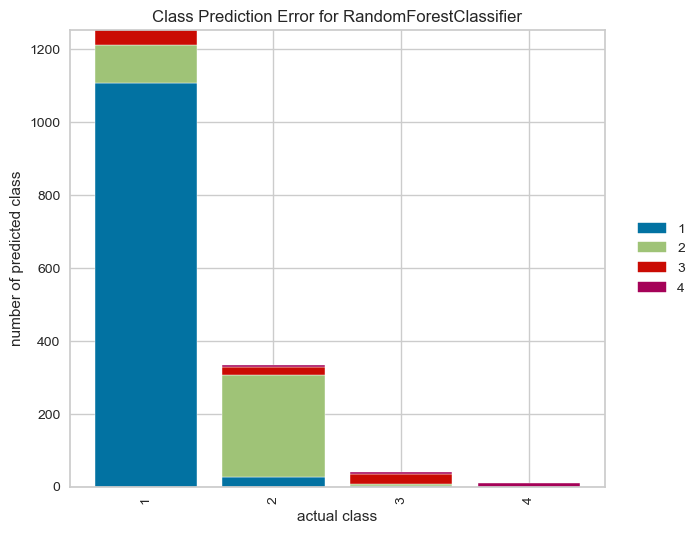

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [81]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### RF Model GridsearchCV

In [82]:
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[10,13,16],
             'min_samples_split':[2,6,10],
             }

In [ ]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

In [84]:
rf_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'min_samples_split': 2,
 'n_estimators': 100}

In [85]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [86]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.7819879187259747, 0.9806922533553096, 0.4894695973321758, 0.964421731219913)

TEST REPORT
              precision    recall  f1-score   support

           1       0.76      0.98      0.86      1138
           2       0.87      0.72      0.79       389
           3       0.61      0.08      0.15       204
           4       1.00      0.09      0.16        90

    accuracy                           0.78      1821
   macro avg       0.81      0.47      0.49      1821
weighted avg       0.78      0.78      0.73      1821




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.97      1.00      0.98      2654
           2       1.00      0.99      1.00       909
           3       1.00      0.90      0.95       475
           4       1.00      0.87      0.93       209

    accuracy                           0.98      4247
   macro avg       0.99      0.94      0.96      4247
weighted avg       0.98      0.98      0.98      4247



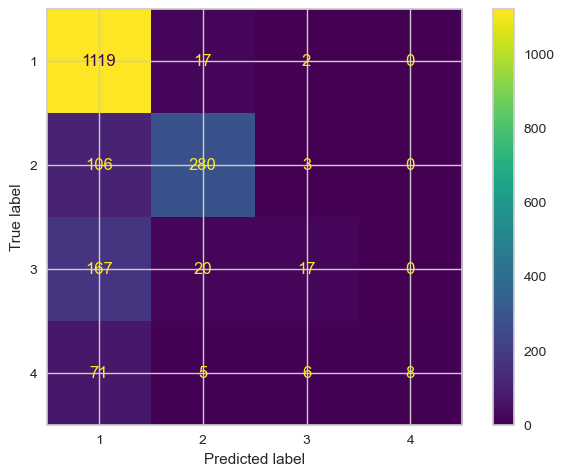

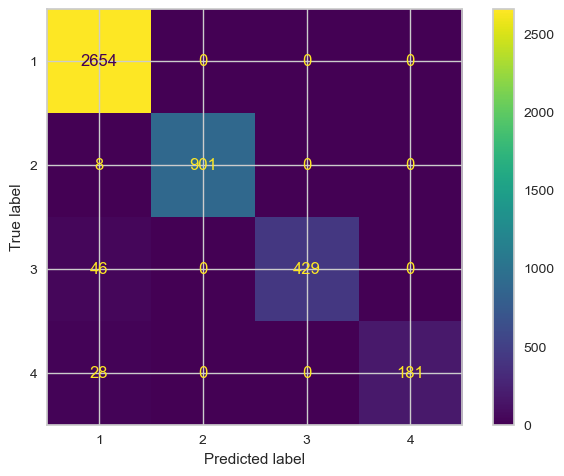

In [87]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(rf_grid_model, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(rf_grid_model, X_train, y_train);

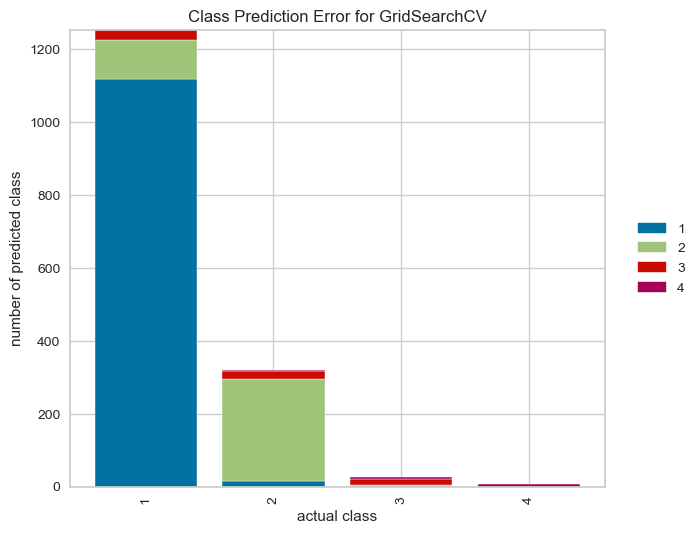

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [88]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

## 4. XGBoost

### Vanilla XGBoost Model

In [89]:
#pip install xgboost --user

In [90]:
from xgboost import XGBClassifier

In [91]:
#conda install -c conda-forge py-xgboost

In [92]:
!xgboost --version

XGBoost: 1.5.1


In [93]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)

[03:45:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=10,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [94]:
y_pred_test = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train)

TEST REPORT
              precision    recall  f1-score   support

           1       0.84      0.96      0.90      1138
           2       0.89      0.86      0.87       389
           3       0.68      0.35      0.46       204
           4       0.91      0.36      0.51        90

    accuracy                           0.84      1821
   macro avg       0.83      0.63      0.69      1821
weighted avg       0.84      0.84      0.83      1821




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2654
           2       1.00      1.00      1.00       909
           3       1.00      1.00      1.00       475
           4       1.00      1.00      1.00       209

    accuracy                           1.00      4247
   macro avg       1.00      1.00      1.00      4247
weighted avg       1.00      1.00      1.00      4247



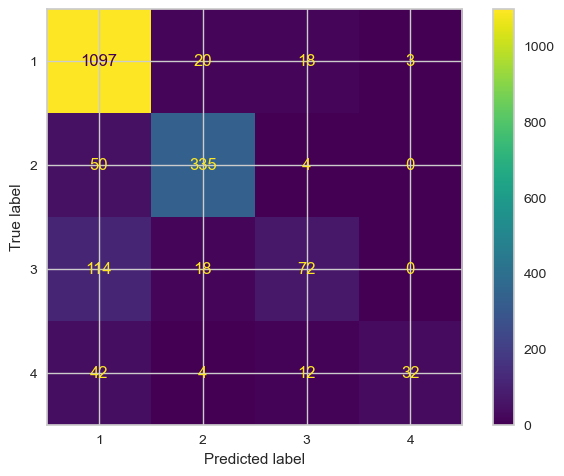

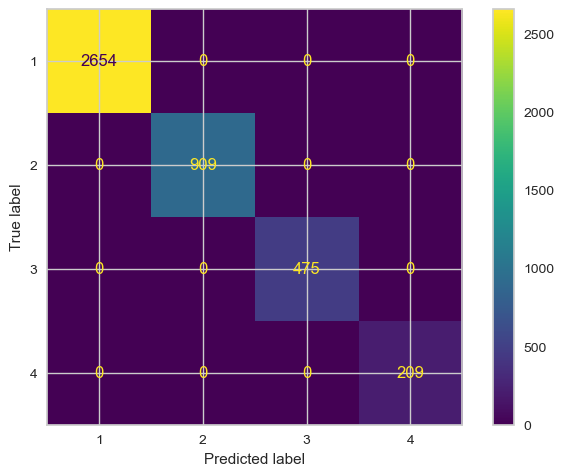

In [95]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(xgb_classifier, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(xgb_classifier, X_train, y_train);

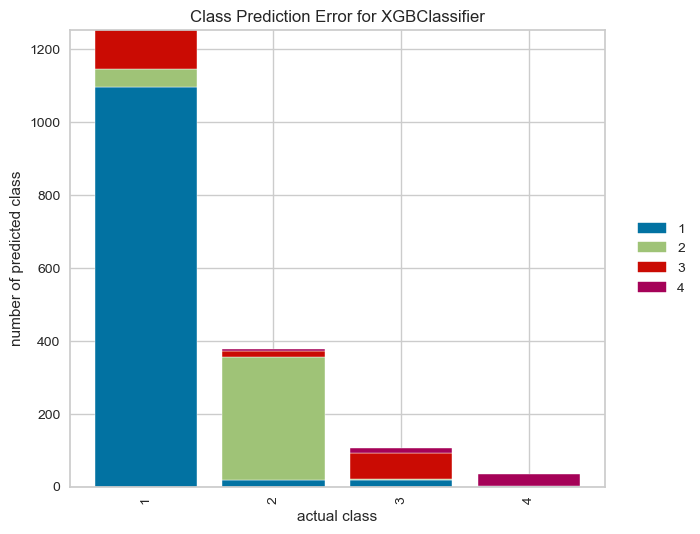

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [96]:
visualizer = ClassPredictionError(xgb_classifier)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### XGBoost Model GridsearchCV

In [97]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [ ]:
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

In [99]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 0.5}

In [100]:
xgb_grid.best_score_

nan

In [106]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred,average='macro')
xgb_recall = recall_score(y_test, y_pred,average='macro')
# xgb_auc = roc_auc_score(y_test, y_pred,average='macro')

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)


Test_Set
[[1107   26    5    0]
 [  93  295    1    0]
 [ 139   17   48    0]
 [  56    4    3   27]]
              precision    recall  f1-score   support

           1       0.79      0.97      0.87      1138
           2       0.86      0.76      0.81       389
           3       0.84      0.24      0.37       204
           4       1.00      0.30      0.46        90

    accuracy                           0.81      1821
   macro avg       0.87      0.57      0.63      1821
weighted avg       0.82      0.81      0.78      1821


Train_Set
[[2625   20    8    1]
 [ 170  735    4    0]
 [ 295   24  155    1]
 [ 131    7    2   69]]
              precision    recall  f1-score   support

           1       0.81      0.99      0.89      2654
           2       0.94      0.81      0.87       909
           3       0.92      0.33      0.48       475
           4       0.97      0.33      0.49       209

    accuracy                           0.84      4247
   macro avg       0.91      0.61

### Feature importance

In [112]:
model = XGBClassifier(random_state=42, colsample_bytree = 0.5, subsample= 0.8)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance",ascending=False)
xgb_imp_feats

[10:42:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,xgb_importance
SubjectsBirthLocation_South Korea,0.038013
Gender_Male,0.035943
SubjectsBirthLocation_Vietnam,0.034106
SubjectsBirthLocation_American Samoa,0.028483
SubjectsBirthLocation_Puerto Rico,0.028221
...,...
SubjectsBirthLocation_Laos,0.000000
SubjectsBirthLocation_Korea,0.000000
SubjectsBirthLocation_Kenya,0.000000
SubjectsBirthLocation_Kentucky,0.000000


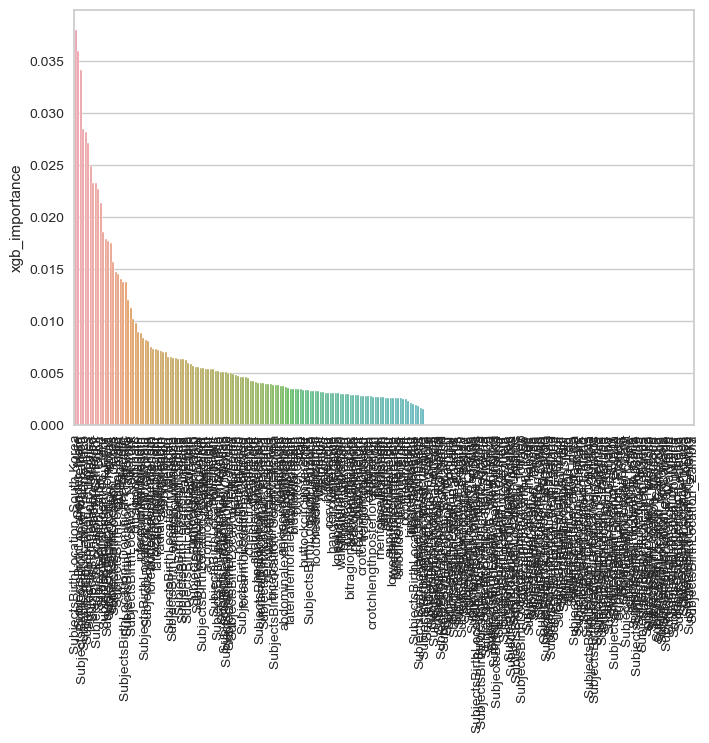

In [311]:
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')

plt.xticks(rotation=90);

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:
#!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.1.1-cp39-cp39-macosx_10_13_x86_64.whl (8.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


##  Smote implement

-- az olan datayi cogullastir
- az olani coka cikarirsin
- cok olani 
-- her iki classın dağılımını bozmadan azaltıyor ya da çoğaltıyor
- cok iyi sonuc vermiyoreee

In [117]:
from imblearn.over_sampling import RandomOverSampler

In [118]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [182]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     299
Name: DODRace, dtype: int64

In [176]:
over = SMOTE(sampling_strategy={4: 1250,3:1250})
under = RandomUnderSampler(sampling_strategy={1:2500})
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [177]:
from imblearn.combine import SMOTEENN,SMOTETomek
ros1 = SMOTETomek()
ros2 = SMOTEENN()
X_resampled, y_resampled = ros1.fit_resample(X_train, y_train)

In [178]:
 X_resampled, y_resampled = ros2.fit_resample(X_resampled, y_resampled)

In [179]:
y_resampled.value_counts()

4    2646
3    2585
2    2415
1     480
Name: DODRace, dtype: int64

In [181]:
y_resampled.value_counts()

4    2646
3    2585
2    2415
1     480
Name: DODRace, dtype: int64

In [180]:

y_train.value_counts()

1    2654
2     909
3     475
4     209
Name: DODRace, dtype: int64

- Burda biz herturlu denemeye ragmen beyaxlarin yani 1 in inbalancesini duzeltemedik. 
- Buna projecede gerekli duzenlemeyi yapicaz.

## SVC Over/Under Sampling

In [193]:
param_grid = {'C': np.linspace(50,200,4),
              'decision_function_shape' : ['ovr'], #'ovo'
              'gamma': ["scale", "auto", 1,2],
              'kernel': ['rbf'],
              'class_weight':["balanced",None]}

f1_scoresSVC =  make_scorer(f1_score, average=None, labels = ["f1_scoresSVC"])
f1_score_weighed = make_scorer(f1_score, average="weighted")

model = SVC()
svm_model_grid = GridSearchCV(model, param_grid, verbose=1, scoring=f1_score_weighed, refit=True,n_jobs=-1)

svm_model_grid.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 50., 100., 150., 200.]),
                         'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovr'],
                         'gamma': ['scale', 'auto', 1, 2], 'kernel': ['rbf']},
             scoring=make_scorer(f1_score, average=weighted), verbose=1)

## Xgboost Over/ Under Sampling

In [ ]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[6,8],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5],
              "colsample_bytree":[0.5, 1]}

xgb_model = XGBClassifier()
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring=f1_scoresSVC, n_jobs = -1,refit=True, verbose = 2).fit(X_resampled, y_resampled)

In [ ]:
xgb_grid_model.best_params_

[[1087   19   27    5]
 [  36  348    5    0]
 [  89   12  102    1]
 [  33    3   10   44]]
              precision    recall  f1-score   support

           1       0.87      0.96      0.91      1138
           2       0.91      0.89      0.90       389
           3       0.71      0.50      0.59       204
           4       0.88      0.49      0.63        90

    accuracy                           0.87      1821
   macro avg       0.84      0.71      0.76      1821
weighted avg       0.86      0.87      0.86      1821



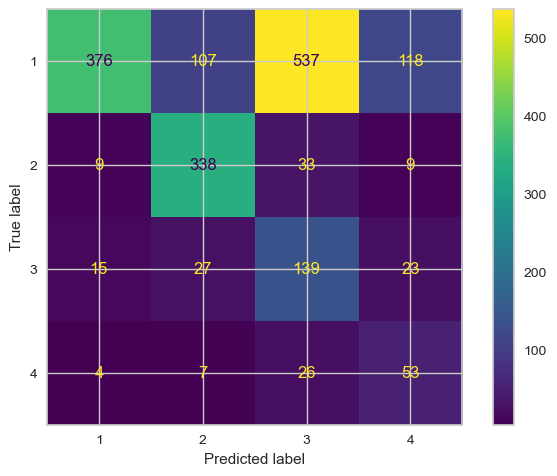

In [303]:
y_pred_train= xgb_grid_model.predict(X_train)
y_pred_test = xgb_grid_model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_grid_model,X_test,y_test);

In [304]:
xgb_accuracy_train = accuracy_score(y_train, y_pred_train)
xgb_accuracy_test =accuracy_score(y_test, y_pred_test)


In [ ]:
plot_multiclass_roc(svm_model_grid, X_test, y_test, n_classes=3, figsize=(16, 10));

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

- bunlarin anlami tanimi ile ilgili birseyler yaz

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7376215262514891

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [ ]:
pip install shap

- hangi feature hangi clasa ne kadar etki ediyor

In [187]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [188]:
shap_values

[array([[ 3.08783133e+01,  4.82576721e+01,  1.59618265e+01,
         -4.83621722e+01,  1.60356436e+01, -1.28887398e+00,
          4.70288871e-01, -1.27718895e+01, -1.47567384e+01,
          9.99599351e+00, -5.56832623e+01,  6.71662256e-02,
         -5.13924314e+01, -4.71886102e+00,  6.43776087e+00,
          6.98979487e+00, -1.16637819e-01, -1.23711047e+01,
         -5.52677025e+00, -9.80559330e+00, -2.18193619e+01,
          4.16914030e+01,  2.73141607e+01,  1.71773257e+01,
         -1.02989178e+01,  1.97120527e+01,  7.96044269e+00,
         -3.51563096e+00,  7.53564769e+00,  2.50509964e-01,
         -2.97617243e-01, -4.84308681e-01, -1.95511203e+01,
          4.49117012e+01, -5.37354326e+00, -1.04056451e+00,
         -1.44139794e+01, -8.49541335e-02,  2.65214328e+01,
         -1.88057893e+01, -1.88210687e+01,  2.00954335e+00,
          2.95154856e+00, -7.02906717e+00, -1.03781162e-02,
          1.61302831e+01, -3.15230767e-01,  1.16533763e-01,
          1.52841556e+01,  2.30334913e+0

In [189]:
print(shap_values[0].shape)

(1, 248)


In [190]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

The log_model predicted: 2


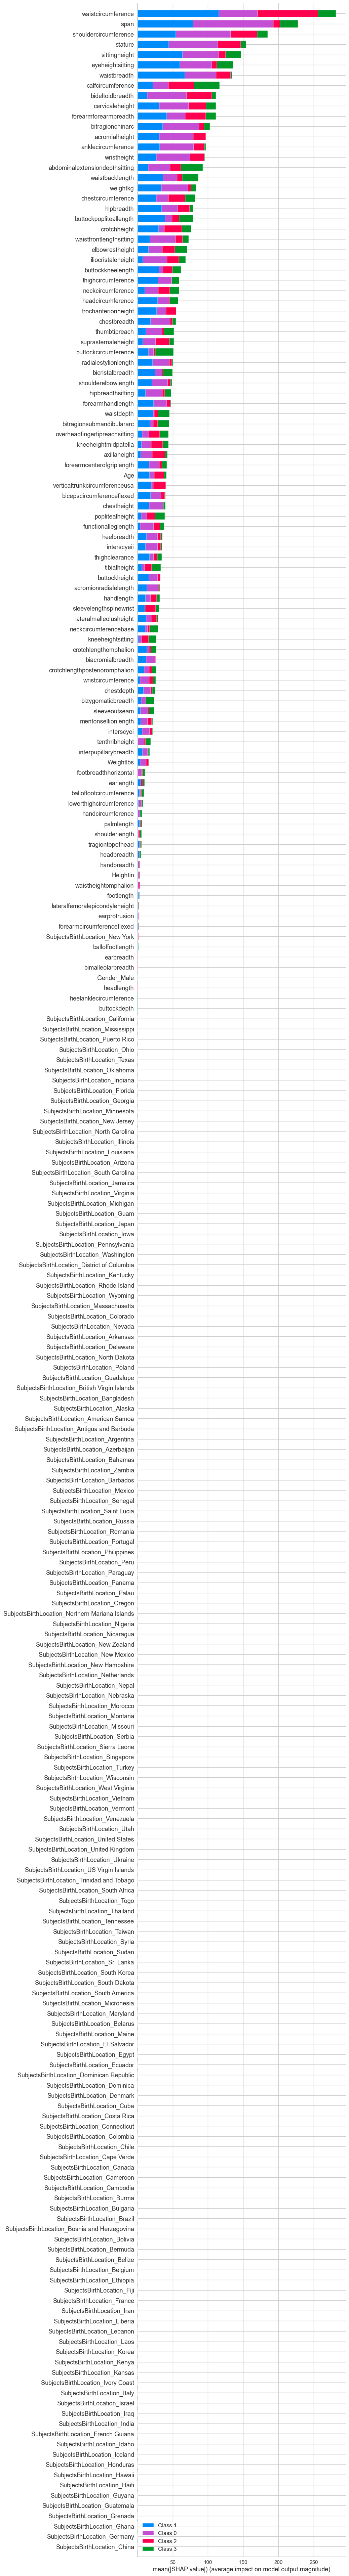

In [191]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

-- en gucluleri al data dan cek bunlari shape ni al
--dumise yap boyut degistir
- 19 feature ile calisiyor
-- smoothe inbalance icin up ve down islemi yaparken
-- shap en iyi etkili featureleri yapiyor

- find the best trashehold diye bise var
onu yap.
- optimal trashe holdan buyuk olari bir digerlerini 0 yap
- sipanicler bir digerli 0 yap yani binary cevirdin
- yani sipanishi max yapcak traheholdu yapiyon

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

Text(0.5, 1.0, 'Train Accuracy Score of Different Models')

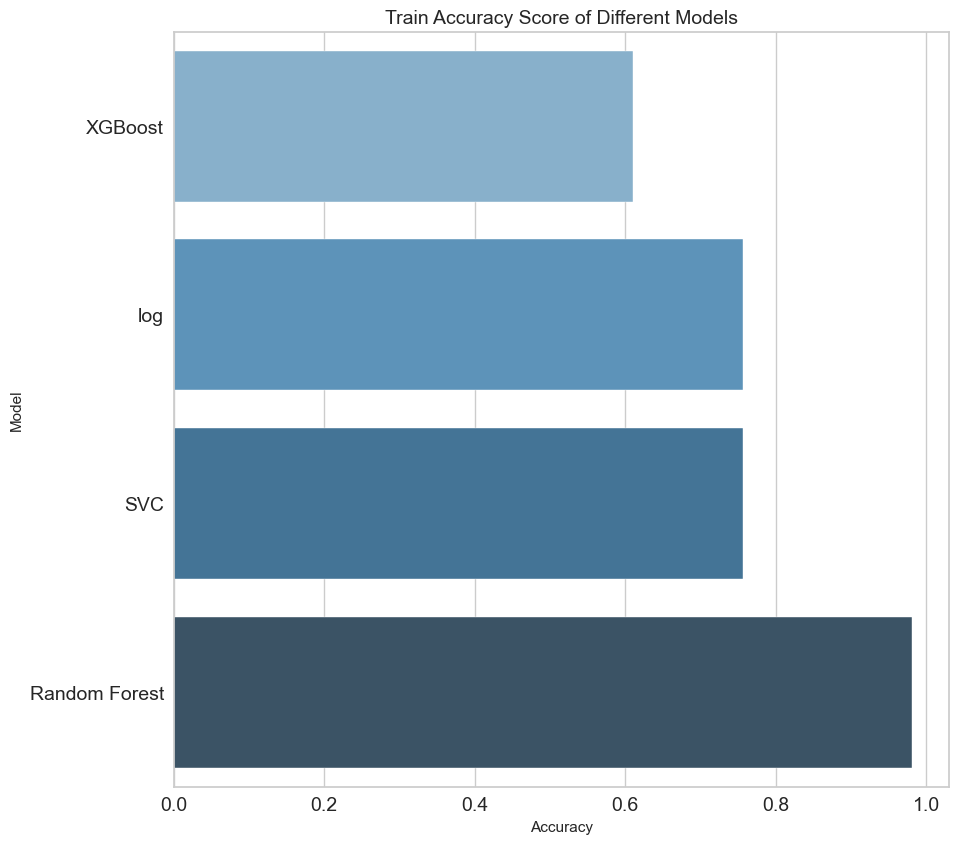

In [305]:
compare = pd.DataFrame({"Model": ["log","SVC", "Random Forest", "XGBoost"],
                        "Accuracy": [log_accuracy_train,SVM_accuracy_train, rfc_accuracy_train, xgb_accuracy_train]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Train Accuracy Score of Different Models", size=14)

Text(0.5, 1.0, 'Test Accuracy Score of Different Models')

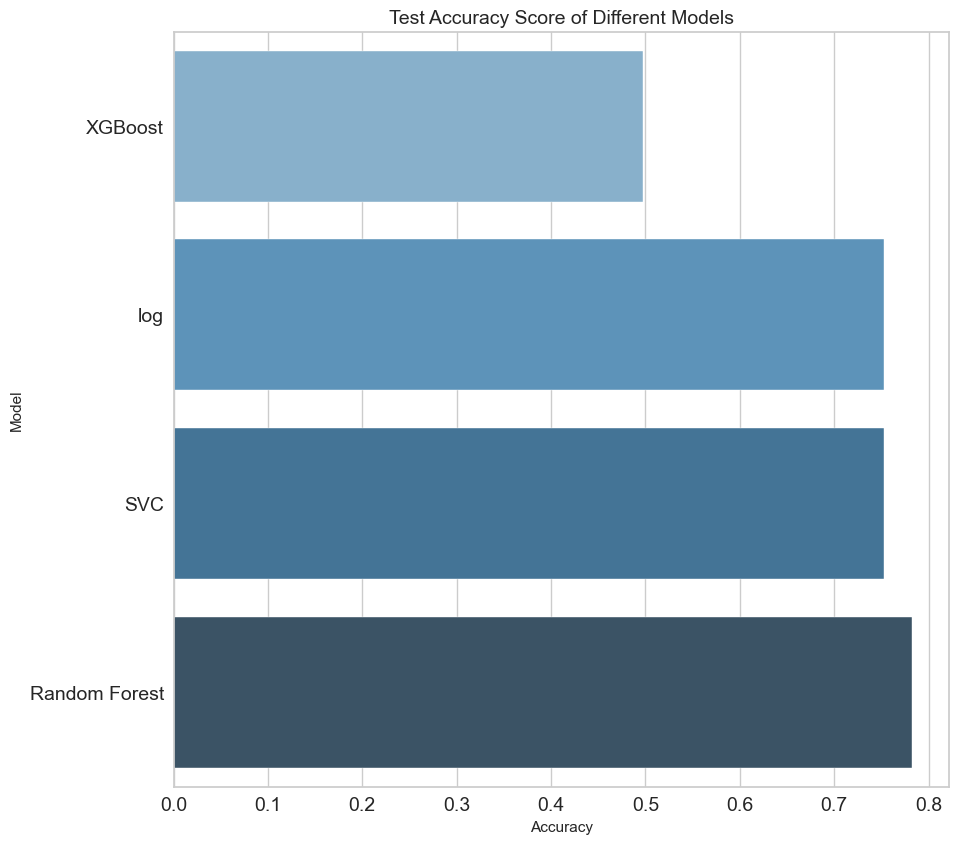

In [308]:
compare = pd.DataFrame({"Model": ["log","SVC", "Random Forest", "XGBoost"],
                        "Accuracy": [log_accuracy_test,SVM_accuracy_test,rfc_accuracy_test, xgb_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14)


--- Arastirmanin sonunda gorulmustur ki Random forest algoritmasi bu clasification problemi icin en iyi sonuc vermektedir.
- Enteresan bir sekilde genelde iyi cozum veren Xgboost algoritmasi burda en kotu sonucu vermistir...
- Modelde tahminimiz icin accuracy on planda oldugu icin o tercih edilmistir.
- Okudugunuz icin tesekkurler...

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___